In [1]:
import importlib
from mpl_toolkits.mplot3d import Axes3D
import os
import numpy as np
from matplotlib import pyplot as plt
import sys
import time
from skimage import data, img_as_float
from skimage import exposure
from PIL import Image

# Example of the horse data set 

In [2]:
Im = np.array(Image.open('../../FM_Eikonal/data/weizmann_horse_db/horse/horse028.png').copy())
Im_Mask = np.array(Image.open('../../FM_Eikonal/data/weizmann_horse_db/mask/horse028.png').copy())

(-0.5, 217.5, 204.5, -0.5)

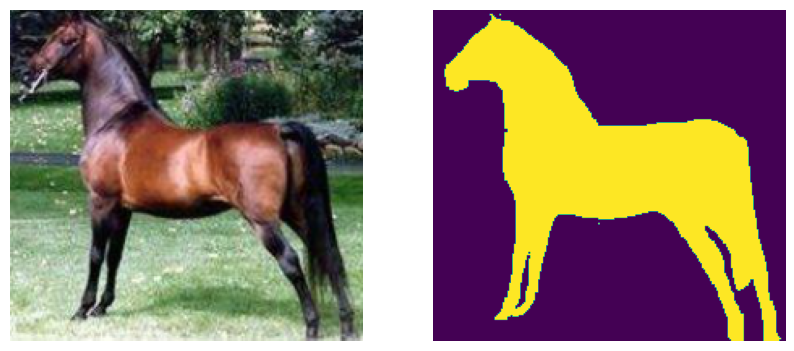

In [3]:
fig = plt.subplots(1,2,figsize = (10,10))
plt.subplot(1,2,1)
plt.imshow(Im)
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(Im_Mask)
plt.axis('off')

# Prepare Training Data Set 

In [20]:
# Prepare the training set for extracting prototypica covariance descriptors for the horse image class

# Random indices 

Ind = np.random.choice(327,20)
Train_Im = []
Train_Mask = []
for im_num in Ind:
    if len(str(im_num)) == 3:
        path_1 = '../../FM_Eikonal/data/weizmann_horse_db/horse/horse'+str(im_num)+".png"
        path_2 = '../../FM_Eikonal/data/weizmann_horse_db/mask/horse'+str(im_num)+".png"
        Im = np.array(Image.open(path_1).copy()).astype(np.double)
        Im_Mask = np.array(Image.open(path_2).copy())
        Train_Im.append(Im)
        Train_Mask.append(Im_Mask)
    elif len(str(im_num)) == 2:
        path_1 = '../../FM_Eikonal/data/weizmann_horse_db/horse/horse0'+str(im_num)+".png"
        path_2 = '../../FM_Eikonal/data/weizmann_horse_db/mask/horse0'+str(im_num)+".png"
        Im = np.array(Image.open(path_1).copy()).astype(np.double)
        Im_Mask = np.array(Image.open(path_2).copy())
        Train_Im.append(Im)
        Train_Mask.append(Im_Mask)
    elif len(str(im_num)) == 1:
        path_1 = '../../FM_Eikonal/data/weizmann_horse_db/horse/horse00'+str(im_num)+".png"
        path_2 = '../../FM_Eikonal/data/weizmann_horse_db/mask/horse00'+str(im_num)+".png"
        Im = np.array(Image.open(path_1).copy()).astype(np.double)
        Im_Mask = np.array(Image.open(path_2).copy())
        Train_Im.append(Im)
        Train_Mask.append(Im_Mask)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

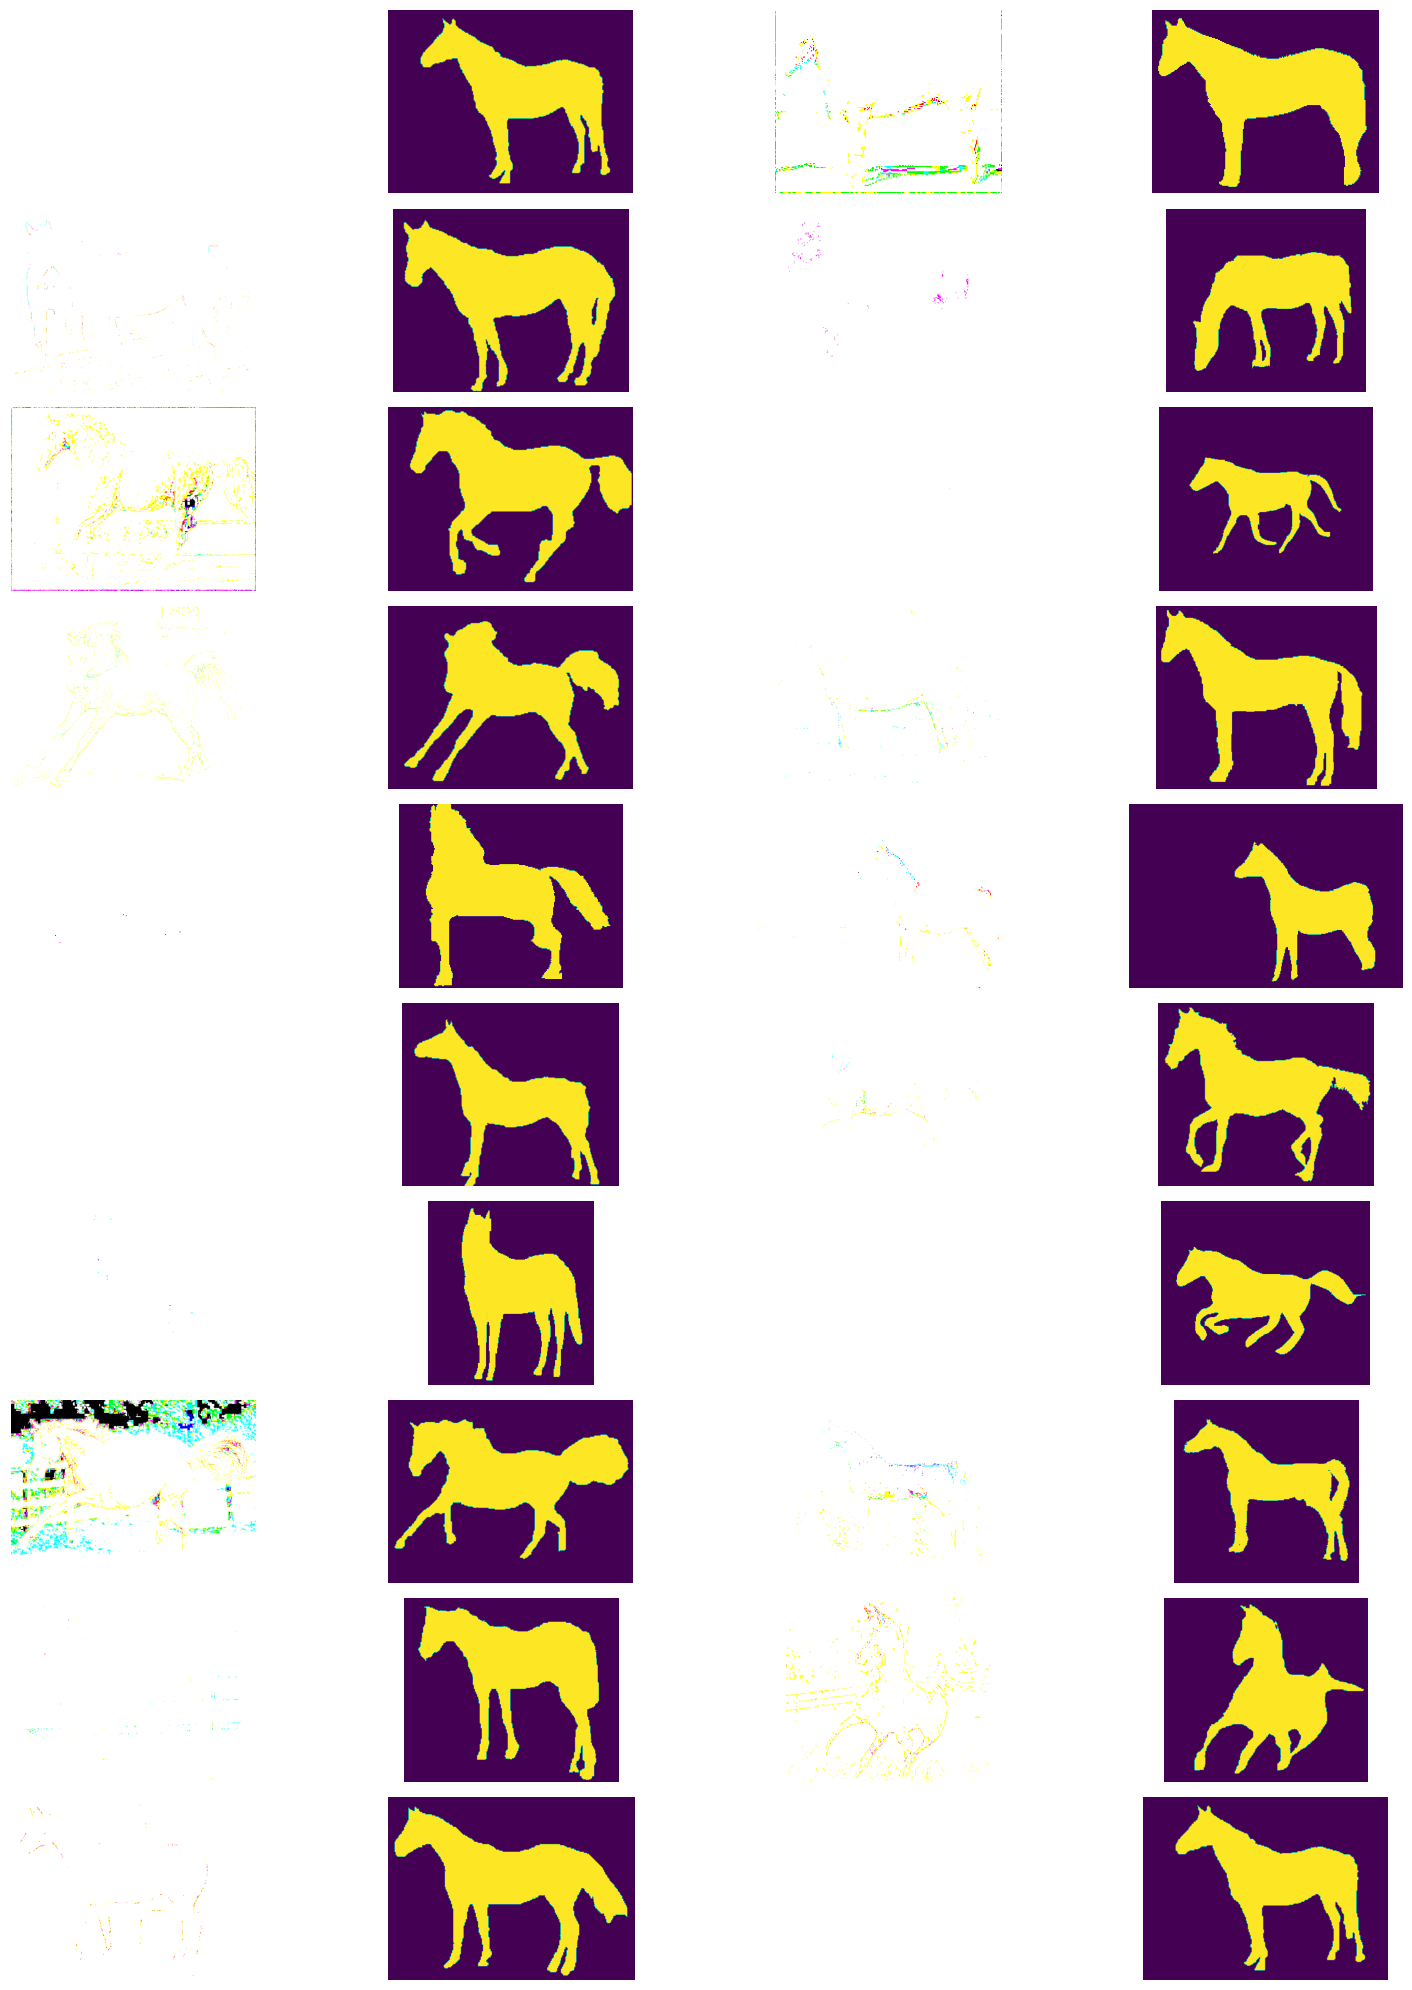

In [21]:
# Create a 10x4 grid of subplots
fig, axes = plt.subplots(10, 4, figsize=(16,20))  # Adjust size to fit

# Flatten axes array for easy indexing
axes = axes.flatten()

# Loop over images and axes
i = 0
for l in range(20):
    ax = axes[i]
    ax.imshow(Train_Im[l], cmap='viridis')  # Display the image
    ax.axis('off')  # Hide axes for a cleaner look
    i+= 1
    ax = axes[i]
    ax.imshow(Train_Mask[l], cmap='viridis')  # Display the image
    ax.axis('off')  # Hide axes for a cleaner look
    i+= 1


plt.tight_layout()
plt.show()
    

# Compute pixel-wise Covariance Features

In [6]:
sys.path.append('/home/dmitrij/Documents/HDE_Code_Folder/Feature_Extraction_Lib/src/Covariance_Descriptor/')
from Feature_Extractor import Features

Cov_Features = Features(Train_Im[0],chanels_num=3)

In [35]:
from scipy.ndimage import gaussian_filter

Train_Descripor_pd = []
for l in range(20):
    Cov_Features = Features(Train_Im[l],chanels_num=3)
    Train_Descripor_pd.append(Cov_Features.covariance_from_fvec())

# Extract Covariance Descriptors 

In [36]:
#from Geometric_Kmeans import Return_Descriptors
from Geometric_Kmeans import K_means

Horse_Descriptors = (Return_Descriptors(Train_Descripor_pd,Train_Mask,20))


Extract Descriptors from Data_Sample ****0*****
Extract Descriptors from Region ****0*****


ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [7]:
Return_Descriptors(Train_Descripor_pd,Train_Mask,20)

TypeError: 'int' object is not iterable

In [34]:
Train_Descripor_pd[10][:,:,0,:,:].shape

(518, 800, 7, 7)

AttributeError: 'list' object has no attribute 'shape'

In [26]:
Train_Descripor_pd[0][:,:,0,:,:][Train_Mask[0] == 1]

IndexError: boolean index did not match indexed array along dimension 0; dimension is 518 but corresponding boolean dimension is 480

In [24]:
def Return_Descriptors(f_cov,Region_Mask,Train_Sample,save = True,Region_num = 2,K = 5,iter = 200):
    Region_Descriptors= np.zeros((Region_num,300,3,7,7))
    starttime = time.time()
    for sample in range(Train_Sample):
        for chan in range(3):
            f_pd = f_cov[sample][:,:,chan,:,:]
            Mask = Region_Mask[sample][:,:]
            print('Extract Descriptors from Data_Sample {:*^10}'.format(sample))
            for k in range(Region_num):
                print('Extract Descriptors from Region {:*^10}'.format(k))
                Ft_Region = f_pd[Mask == k]
                ' Pick Random Cov Matrices '
                Region_Descriptors[k,sample,chan,:,:] = K_means(Ft_Region,K,Max_Iter=iter)
    Endtime = time.time()-starttime
    print('Finished in ---{:*^10}---'.format(Endtime))
    if save == True:
        np.save('/src/Covariance_Descriptor/Prototypes/Region_Descriptors_'+str(K),Region_Descriptors) 
    return Region_Descriptors